In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
credited = pd.read_csv("Desktop/oasis projects/creditcard.csv")

In [5]:
credited = pd.DataFrame(credited)

In [7]:
credited.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
credited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
print(credited['Time'].unique())

[0.00000e+00 1.00000e+00 2.00000e+00 ... 1.72787e+05 1.72788e+05
 1.72792e+05]


In [13]:
print(credited.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [15]:
print(credited["Class"].value_counts()) 

Class
0    284315
1       492
Name: count, dtype: int64


In [17]:
credited.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [19]:
print(credited['Class'].value_counts(normalize=True) * 100)

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [21]:
import warnings
warnings.filterwarnings("ignore")

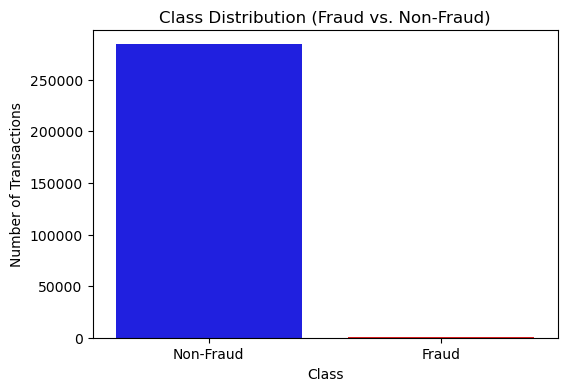

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=credited, palette=['blue', 'red'])
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.title("Class Distribution (Fraud vs. Non-Fraud)")
plt.ylabel("Number of Transactions")
plt.show()

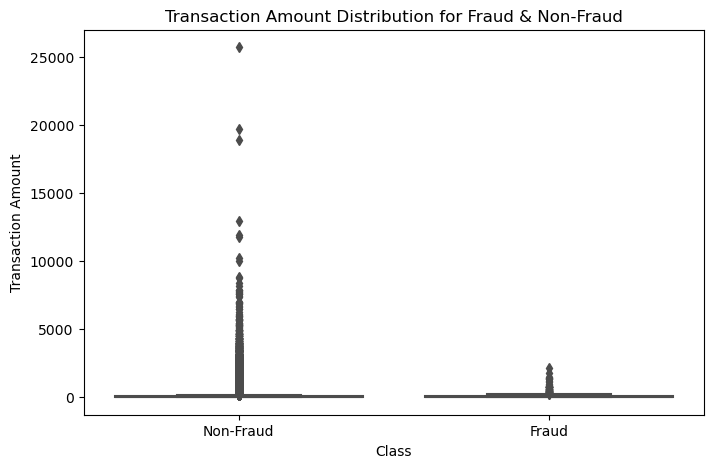

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Class", y="Amount", data=credited, palette=['blue', 'red'])
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.title("Transaction Amount Distribution for Fraud & Non-Fraud")
plt.ylabel("Transaction Amount")
plt.xlabel("Class")
plt.show()

Non-Fraud transactions have a lot of outliers (amounts going up to ₹25,000).  
Fraud transactions don’t seem to have very high amounts, but a few outliers are present.  
Most fraud transactions are in the low-value range.

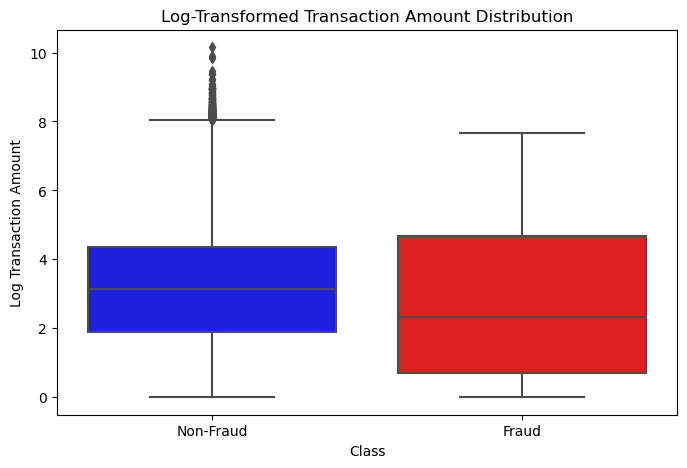

In [27]:
credited['Amount_Log'] = np.log1p(credited['Amount'])  

plt.figure(figsize=(8,5))
sns.boxplot(x="Class", y="Amount_Log", data=credited, palette=['blue', 'red'])
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.title("Log-Transformed Transaction Amount Distribution")
plt.ylabel("Log Transaction Amount")
plt.xlabel("Class")
plt.show()

# 📌Insights from the Graph:  
- The log-transformed amount of fraud transactions is slightly more spread out than non-fraud transactions.  
- Outliers are still present, but the overall distribution appears better normalized.  
- Fraud transactions include a significant number of low-value transactions, but high-value transactions are also present.

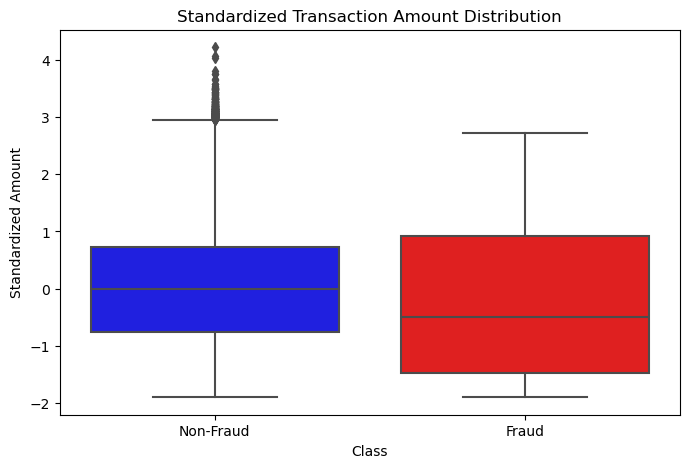

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
credited['Amount_Scaled'] = scaler.fit_transform(credited[['Amount_Log']])

plt.figure(figsize=(8,5))
sns.boxplot(x="Class", y="Amount_Scaled", data=credited, palette=['blue', 'red'])
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.title("Standardized Transaction Amount Distribution")
plt.ylabel("Standardized Amount")
plt.xlabel("Class")
plt.show()

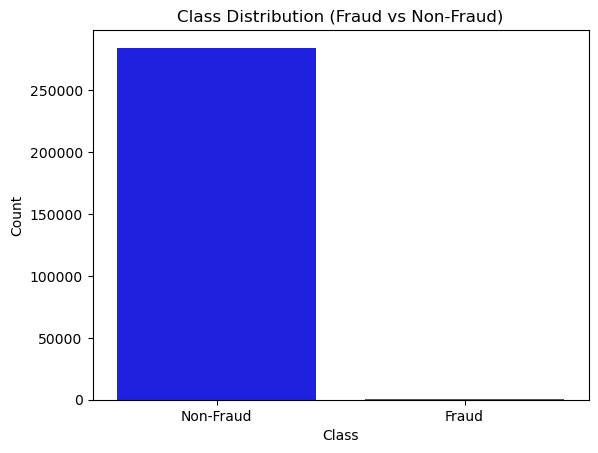

In [31]:
sns.countplot(x="Class", data=credited, palette=['blue', 'red'])
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.show()

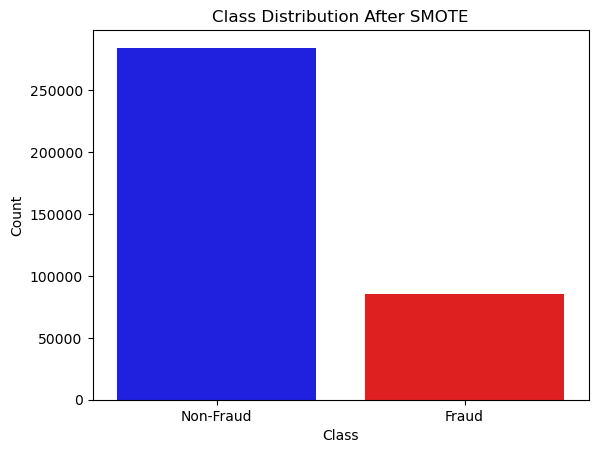

In [33]:
from imblearn.over_sampling import SMOTE

X = credited.drop(columns=['Class']) 
y = credited['Class']  

smote = SMOTE(sampling_strategy=0.3, random_state=42) 
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class balance
sns.countplot(x=y_resampled, palette=['blue', 'red'])
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.show()


In [35]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     56912
           1       0.97      0.94      0.96     17010

    accuracy                           0.98     73922
   macro avg       0.98      0.97      0.97     73922
weighted avg       0.98      0.98      0.98     73922



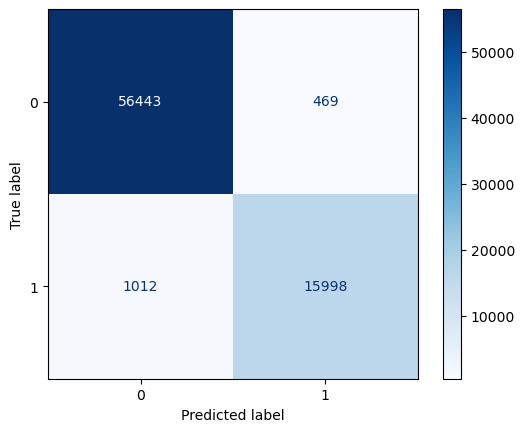

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()


In [37]:
feature_importance = np.abs(model.coef_[0])
feature_names = X_train.columns

# Creating DataFrame for visualization
feat_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feat_importance_df = feat_importance_df.sort_values(by="Importance", ascending=False)

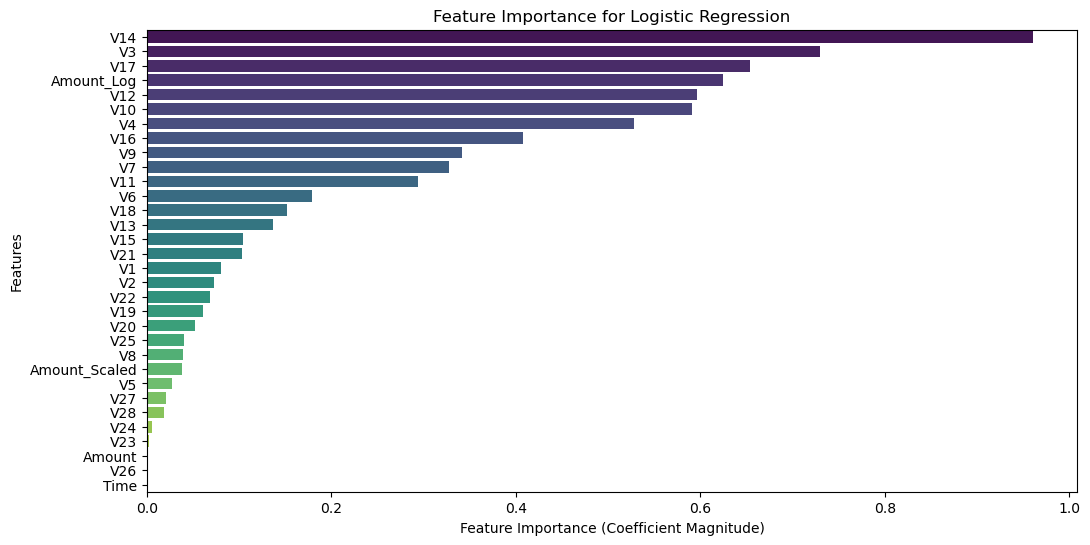

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(x=feat_importance_df['Importance'], y=feat_importance_df['Feature'], palette="viridis")
plt.xlabel("Feature Importance (Coefficient Magnitude)")
plt.ylabel("Features")
plt.title("Feature Importance for Logistic Regression")
plt.show()

In [39]:
 #Train a Random Forest model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [41]:
# Get feature importances
feature_importance = rf_model.feature_importances_

# Convert to DataFrame for better visualization
import pandas as pd
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

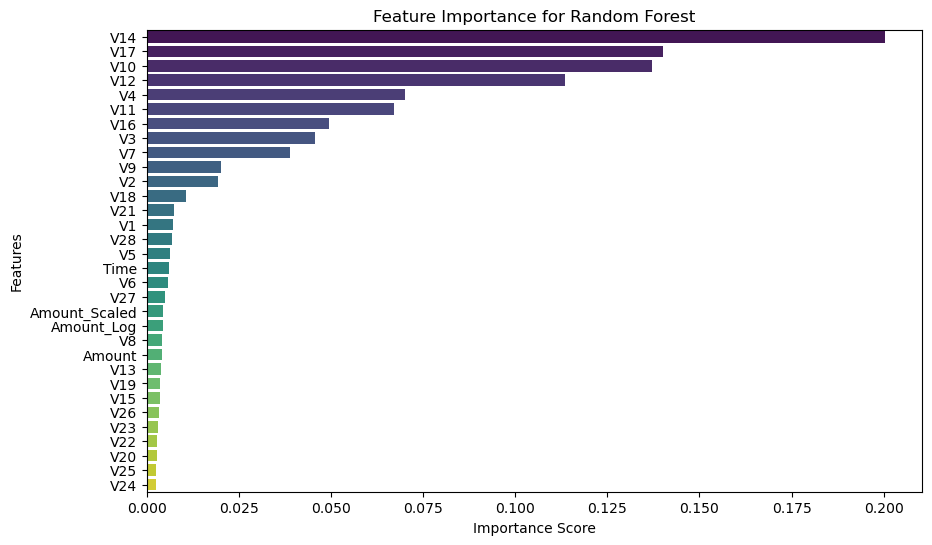

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')
plt.title("Feature Importance for Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [45]:
top_features = ['V14', 'V17', 'V10', 'V12', 'V4', 'V11', 'V16', 'V3', 'V7', 'V9']
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

In [47]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=7, random_state=42)
rf_model.fit(X_train_selected, y_train)

y_pred = rf_model.predict(X_test_selected)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     56912
           1       1.00      0.94      0.97     17010

    accuracy                           0.98     73922
   macro avg       0.99      0.97      0.98     73922
weighted avg       0.99      0.98      0.98     73922



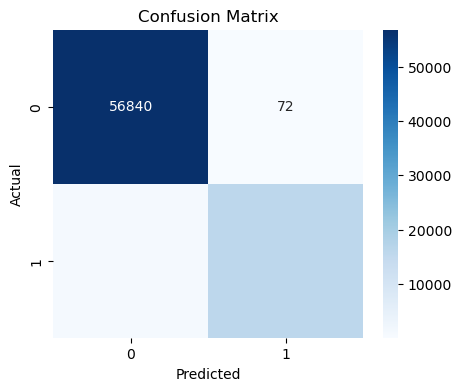

In [59]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

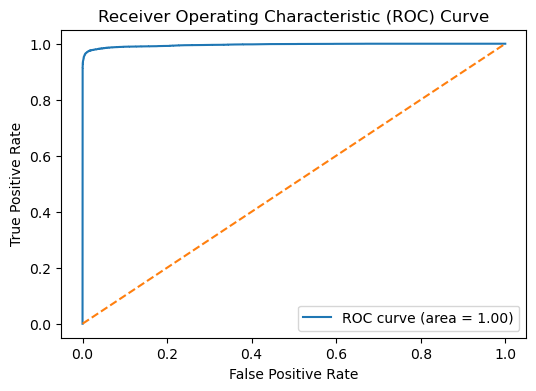

In [48]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = rf_model.predict_proba(X_test_selected)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

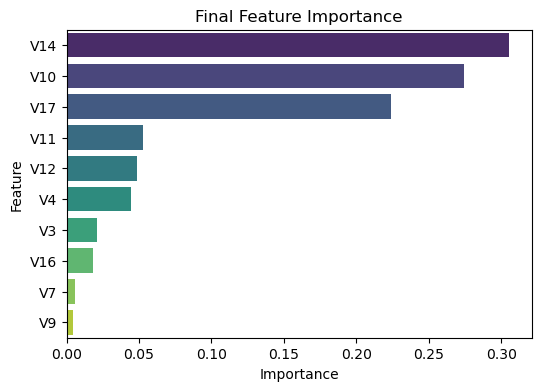

In [51]:
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': top_features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Final Feature Importance')
plt.show()

In [67]:
%%writefile app.py
print("Fraud Detection Model Running...")

Writing app.py


In [69]:
!python app.py

Fraud Detection Model Running...


In [75]:
import pickle
# Dummy data (replacing  with real dataset)
X_train = np.random.rand(100, 5)  # 100 rows, 5 features
y_train = np.random.randint(0, 2, 100)  # Binary classification (0 or 1)

# Model training
model = RandomForestClassifier()
model.fit(X_train, y_train)


with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model successfully saved as model.pkl")


Model successfully saved as model.pkl


In [77]:
# Model loading
with open("model.pkl", "rb") as file:
    model = pickle.load(file)

# Sample test data 
x_test = np.random.rand(1, 5)  

# Prediction
prediction = model.predict(x_test)
print("Fraud Detection Prediction:", prediction)

Fraud Detection Prediction: [1]


In [79]:
y_true = [1]  # Actual label
print("Accuracy:", accuracy_score(y_true, prediction))
print("Report:\n", classification_report(y_true, prediction))

Accuracy: 1.0
Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [81]:
y_true = [0, 1, 1, 0, 1]  # Actual labels
y_pred = [0, 1, 1, 0, 1]  # Model Predictions

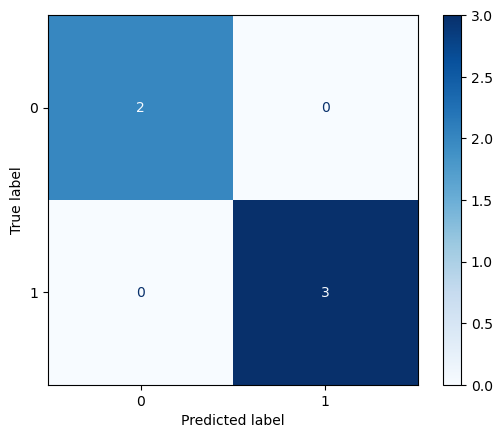

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()